# Graph analysis of Single Cell Stimulation project


This code is made to analyze all the data stored from segmentation of MDCK cells expressing OptoShroom and stimulated with 488nm light

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
from os import listdir
# Set matplotlib backend
%matplotlib inline 

In [2]:
DataOutputFolder = r"C:\Users\ara\Documents\Python Scripts\Repeated Stimulation Analysis\Analyzed Data"
FolderToSave = r"C:\Users\ara\Documents\Python Scripts\Repeated Stimulation Analysis\Graphs"


listofnames = listdir(DataOutputFolder)
print(listofnames)
NumbCells = int(len(listofnames)/2)

listofbasal = []
listofapical = []
for i in range(len(listofnames)):
    loadfile = join(DataOutputFolder, listofnames[i])
    temp = np.genfromtxt(loadfile, delimiter=',')
    if "basal" in listofnames[i]:
        listofbasal.append(temp)
    elif "apical" in listofnames[i]:
        listofapical.append(temp)
    else:
        print("file mislabeled " + listofnames[i])
print(NumbCells)
print(listofapical[1])

['20201104 Single Cell repeated stim 1 att2_analyzed_apical2020_11_07.csv', '20201104 Single Cell repeated stim 1 att2_analyzed_basal2020_11_07.csv', '20201104 Single Cell repeated stim 1 att3_analyzed_apical2020_11_07.csv', '20201104 Single Cell repeated stim 1 att3_analyzed_basal2020_11_07.csv', '20201104 Single Cell repeated stim 1 att4_analyzed_apical2020_11_07.csv', '20201104 Single Cell repeated stim 1 att4_analyzed_basal2020_11_07.csv', '20201113 Single Cell repeated stim 2 att2_analyzed_apical2020_11_13.csv', '20201113 Single Cell repeated stim 2 att2_analyzed_basal2020_11_13.csv', '20201113 Single Cell repeated stim 2 att3_analyzed_apical2020_11_13.csv', '20201113 Single Cell repeated stim 2 att3_analyzed_basal2020_11_13.csv', '20201113 Single Cell repeated stim 2 att4_analyzed_apical2020_11_13.csv', '20201113 Single Cell repeated stim 2 att4_analyzed_basal2020_11_13.csv', '20201211 Optoshroom repeated stim 3 att2_analyzed_apical2020_12_15.csv', '20201211 Optoshroom repeated s

In [3]:
#Now that we have all files we just have to create list with relative sizes:
RelativeSizesApical = []
for i in range(NumbCells):
    templist = listofapical[i][:,1]/listofapical[i][10,1] # Relative to the 10th timepoint, just before stim
    RelativeSizesApical.append(templist)
print(RelativeSizesApical)

RelativeSizesBasal = []
for i in range(NumbCells):
    templist = listofbasal[i][:,1]/listofbasal[i][10,1] # Relative to the 10th timepoint, just before stim
    RelativeSizesBasal.append(templist)

#Also, let's make apicobasal ratio. This code depends on the fact that apical and basal are on the same order
#If this is not true, I will make a more specific code

apicobasalratio = []
for i in range(NumbCells):
    templist = []
    for a in range(len(listofapical[i][:,1])):
        tempval = listofapical[i][a,1]/listofbasal[i][a,1] # Relative to the 10th timepoint, just before stim
        templist.append(tempval)
    apicobasalratio.append(templist)


[array([1.00305455, 1.01658182, 1.01890909, 1.02909091, 1.04130909,
       1.02385455, 1.01687273, 1.01192727, 1.00567273, 0.99883636,
       1.        , 0.94007273, 0.94167273, 0.95287273, 0.92378182,
       0.85963636, 0.86356364, 0.84189091, 0.86094545, 0.81338182,
       0.79752727, 0.76669091, 0.76698182, 0.79941818, 0.80378182,
       0.84421818, 0.8192    , 0.81585455, 0.83185455, 0.83563636,
       0.83243636, 0.82298182, 0.82152727, 0.81643636, 0.79621818,
       0.75272727, 0.75490909, 0.72945455, 0.70414545, 0.71810909,
       0.6848    , 0.63854545, 0.64349091, 0.71243636, 0.74661818,
       0.75869091, 0.76334545, 0.77338182, 0.82487273, 0.76509091,
       0.83301818, 0.84814545, 0.82923636, 0.75665455, 0.72363636,
       0.77425455, 0.66458182, 0.6512    , 0.61469091, 0.59025455,
       0.57105455, 0.59490909, 0.58007273, 0.7104    , 0.6848    ,
       0.66661818, 0.69527273, 0.64887273, 0.66952727, 0.67607273]), array([0.98104457, 0.95704779, 0.97277677, 0.98185118, 0.97

In [4]:
#Now we can get mean and sd! 
#To get them we will need to put all timepoints together in the same list!: 
time = 70

meanapical = []
sdapical = []
for t in range(time):
    temptimepoint = []
    for i in range(NumbCells):
        temptimepoint.append(RelativeSizesApical[i][t])
    tempmean = np.mean(temptimepoint)
    tempstd = np.std(temptimepoint)
    meanapical.append(tempmean)
    sdapical.append(tempstd)
print(meanapical)
print(sdapical)



meanbasal = []
sdbasal = []
for t in range(time):
    temptimepoint = []
    for i in range(NumbCells):
        temptimepoint.append(RelativeSizesBasal[i][t])
    tempmean = np.mean(temptimepoint)
    tempstd = np.std(temptimepoint)
    meanbasal.append(tempmean)
    sdbasal.append(tempstd)
print(meanbasal)
print(sdbasal)

#Also for ratio?

meanratio = []
sdratio = []
for t in range(time):
    temptimepoint = []
    for i in range(NumbCells):
        temptimepoint.append(apicobasalratio[i][t])
    tempmean = np.mean(temptimepoint)
    tempstd = np.std(temptimepoint)
    meanratio.append(tempmean)
    sdratio.append(tempstd)
print(meanratio)
print(sdratio)

[0.9958630307403088, 0.9963948003922369, 0.9955308625745798, 0.998044610687286, 0.9972969034839005, 0.9953877074331619, 0.9897002732708375, 0.9899195296373908, 0.9939632384025113, 0.9955324453939182, 1.0, 0.9701614475880556, 0.9392847172925857, 0.9226415386047886, 0.9098482597631761, 0.894784249482344, 0.8841372965421317, 0.8700144564973318, 0.8619770997726941, 0.8491187998339501, 0.8339427307440028, 0.8317343720331282, 0.8494966066393743, 0.8686994261696137, 0.8758565328010219, 0.8926995758993399, 0.8925521153993363, 0.8978660593268424, 0.9085461374499042, 0.9131163583170258, 0.9086030574879818, 0.8909117963438393, 0.8613215470334963, 0.8474538869926151, 0.8369715877911719, 0.8243005892497184, 0.8170740796102864, 0.8046194448295838, 0.7976262705114909, 0.7980322090486779, 0.7895020999855356, 0.785009721019823, 0.809391421814104, 0.8361889103727294, 0.8494378934013243, 0.8678477740743572, 0.866701433745251, 0.8844766430949829, 0.8899548815963704, 0.8896563986735773, 0.9047603652051432,

C:\Users\ara\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ara\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ara\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ara\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: color is redundantly defined by the 'color' 

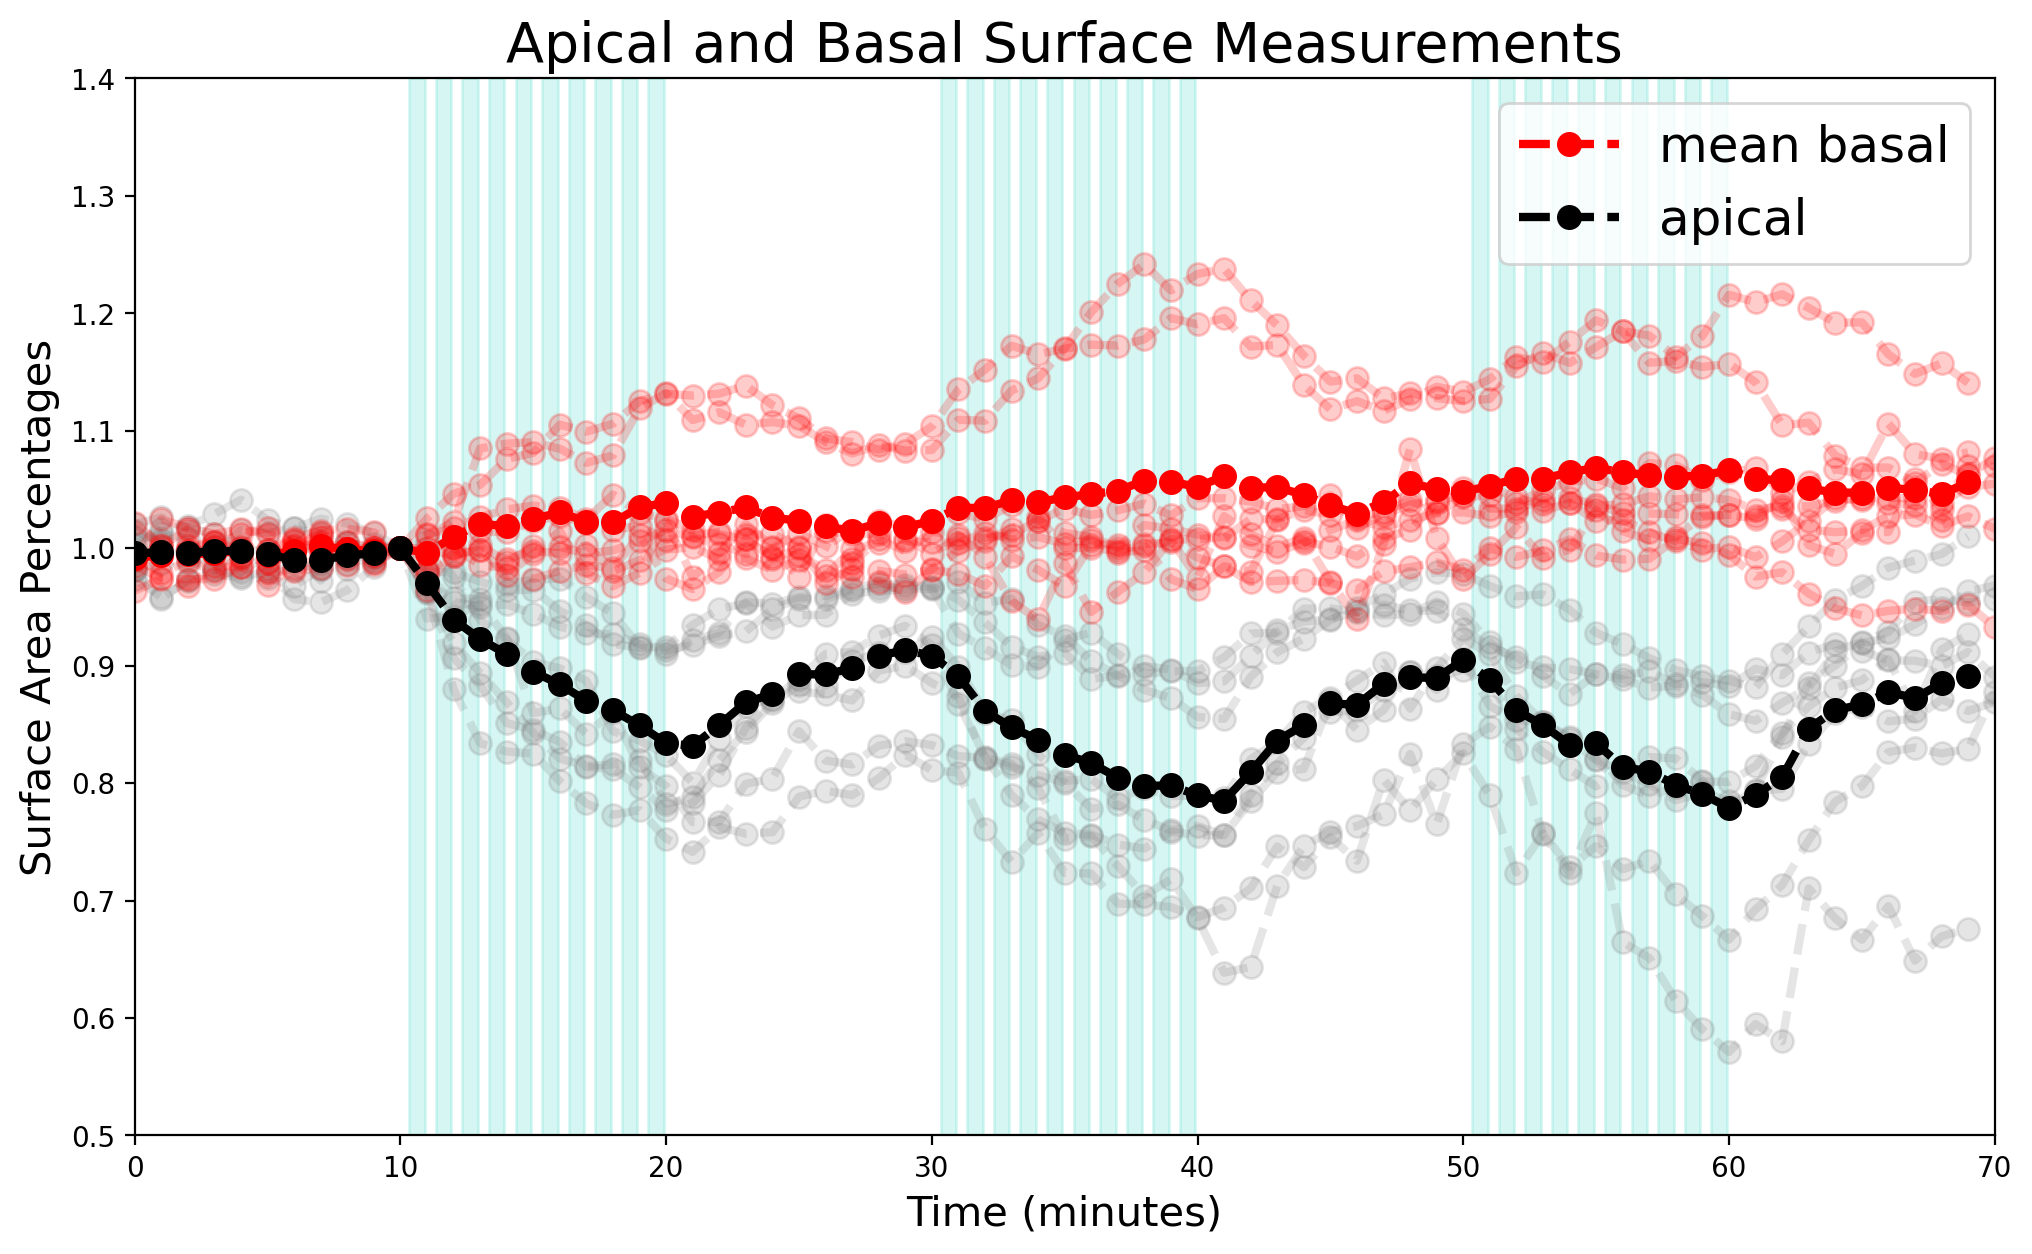

In [5]:
#Now we can plot!! 
plt.figure(figsize = (12, 7), dpi=200)
for i in range(10, 20):
    plt.axvspan(i + 0.333, i + 0.917, color = '#78e3d8', alpha = 0.3)
for i in range(30, 40):
    plt.axvspan(i + 0.333, i + 0.917, color = '#78e3d8', alpha = 0.3)
for i in range(50, 60):
    plt.axvspan(i + 0.333, i + 0.917, color = '#78e3d8', alpha = 0.3)
for n in range(NumbCells):
    plt.plot(listofapical[n][:,0], RelativeSizesApical[n], 'go--', linewidth = 3, markersize = 8, color = 'gray', alpha = 0.2)
for n in range(NumbCells):
    plt.plot(listofbasal[n][:,0], RelativeSizesBasal[n], 'go--', linewidth = 3, markersize = 8, color = 'red', alpha = 0.2)
plt.plot(listofbasal[0][:,0], meanbasal, 'go--', linewidth = 3, markersize = 8, color = 'red', label = 'mean basal' )
plt.plot(listofapical[0][:,0], meanapical, 'go--', linewidth = 3, markersize = 8, color = 'black', label = 'apical' )
plt.title('Apical and Basal Surface Measurements', fontsize = 20)
plt.xlabel('Time (minutes)', fontsize = 15)
plt.ylabel('Surface Area Percentages', fontsize = 15)
plt.legend(fontsize = '18')
plt.axis([0, 70, 0.5, 1.4])
#plt.savefig(filesaver +'_ConstrictionGraph.png',  bbox_inches='tight')
plt.show()

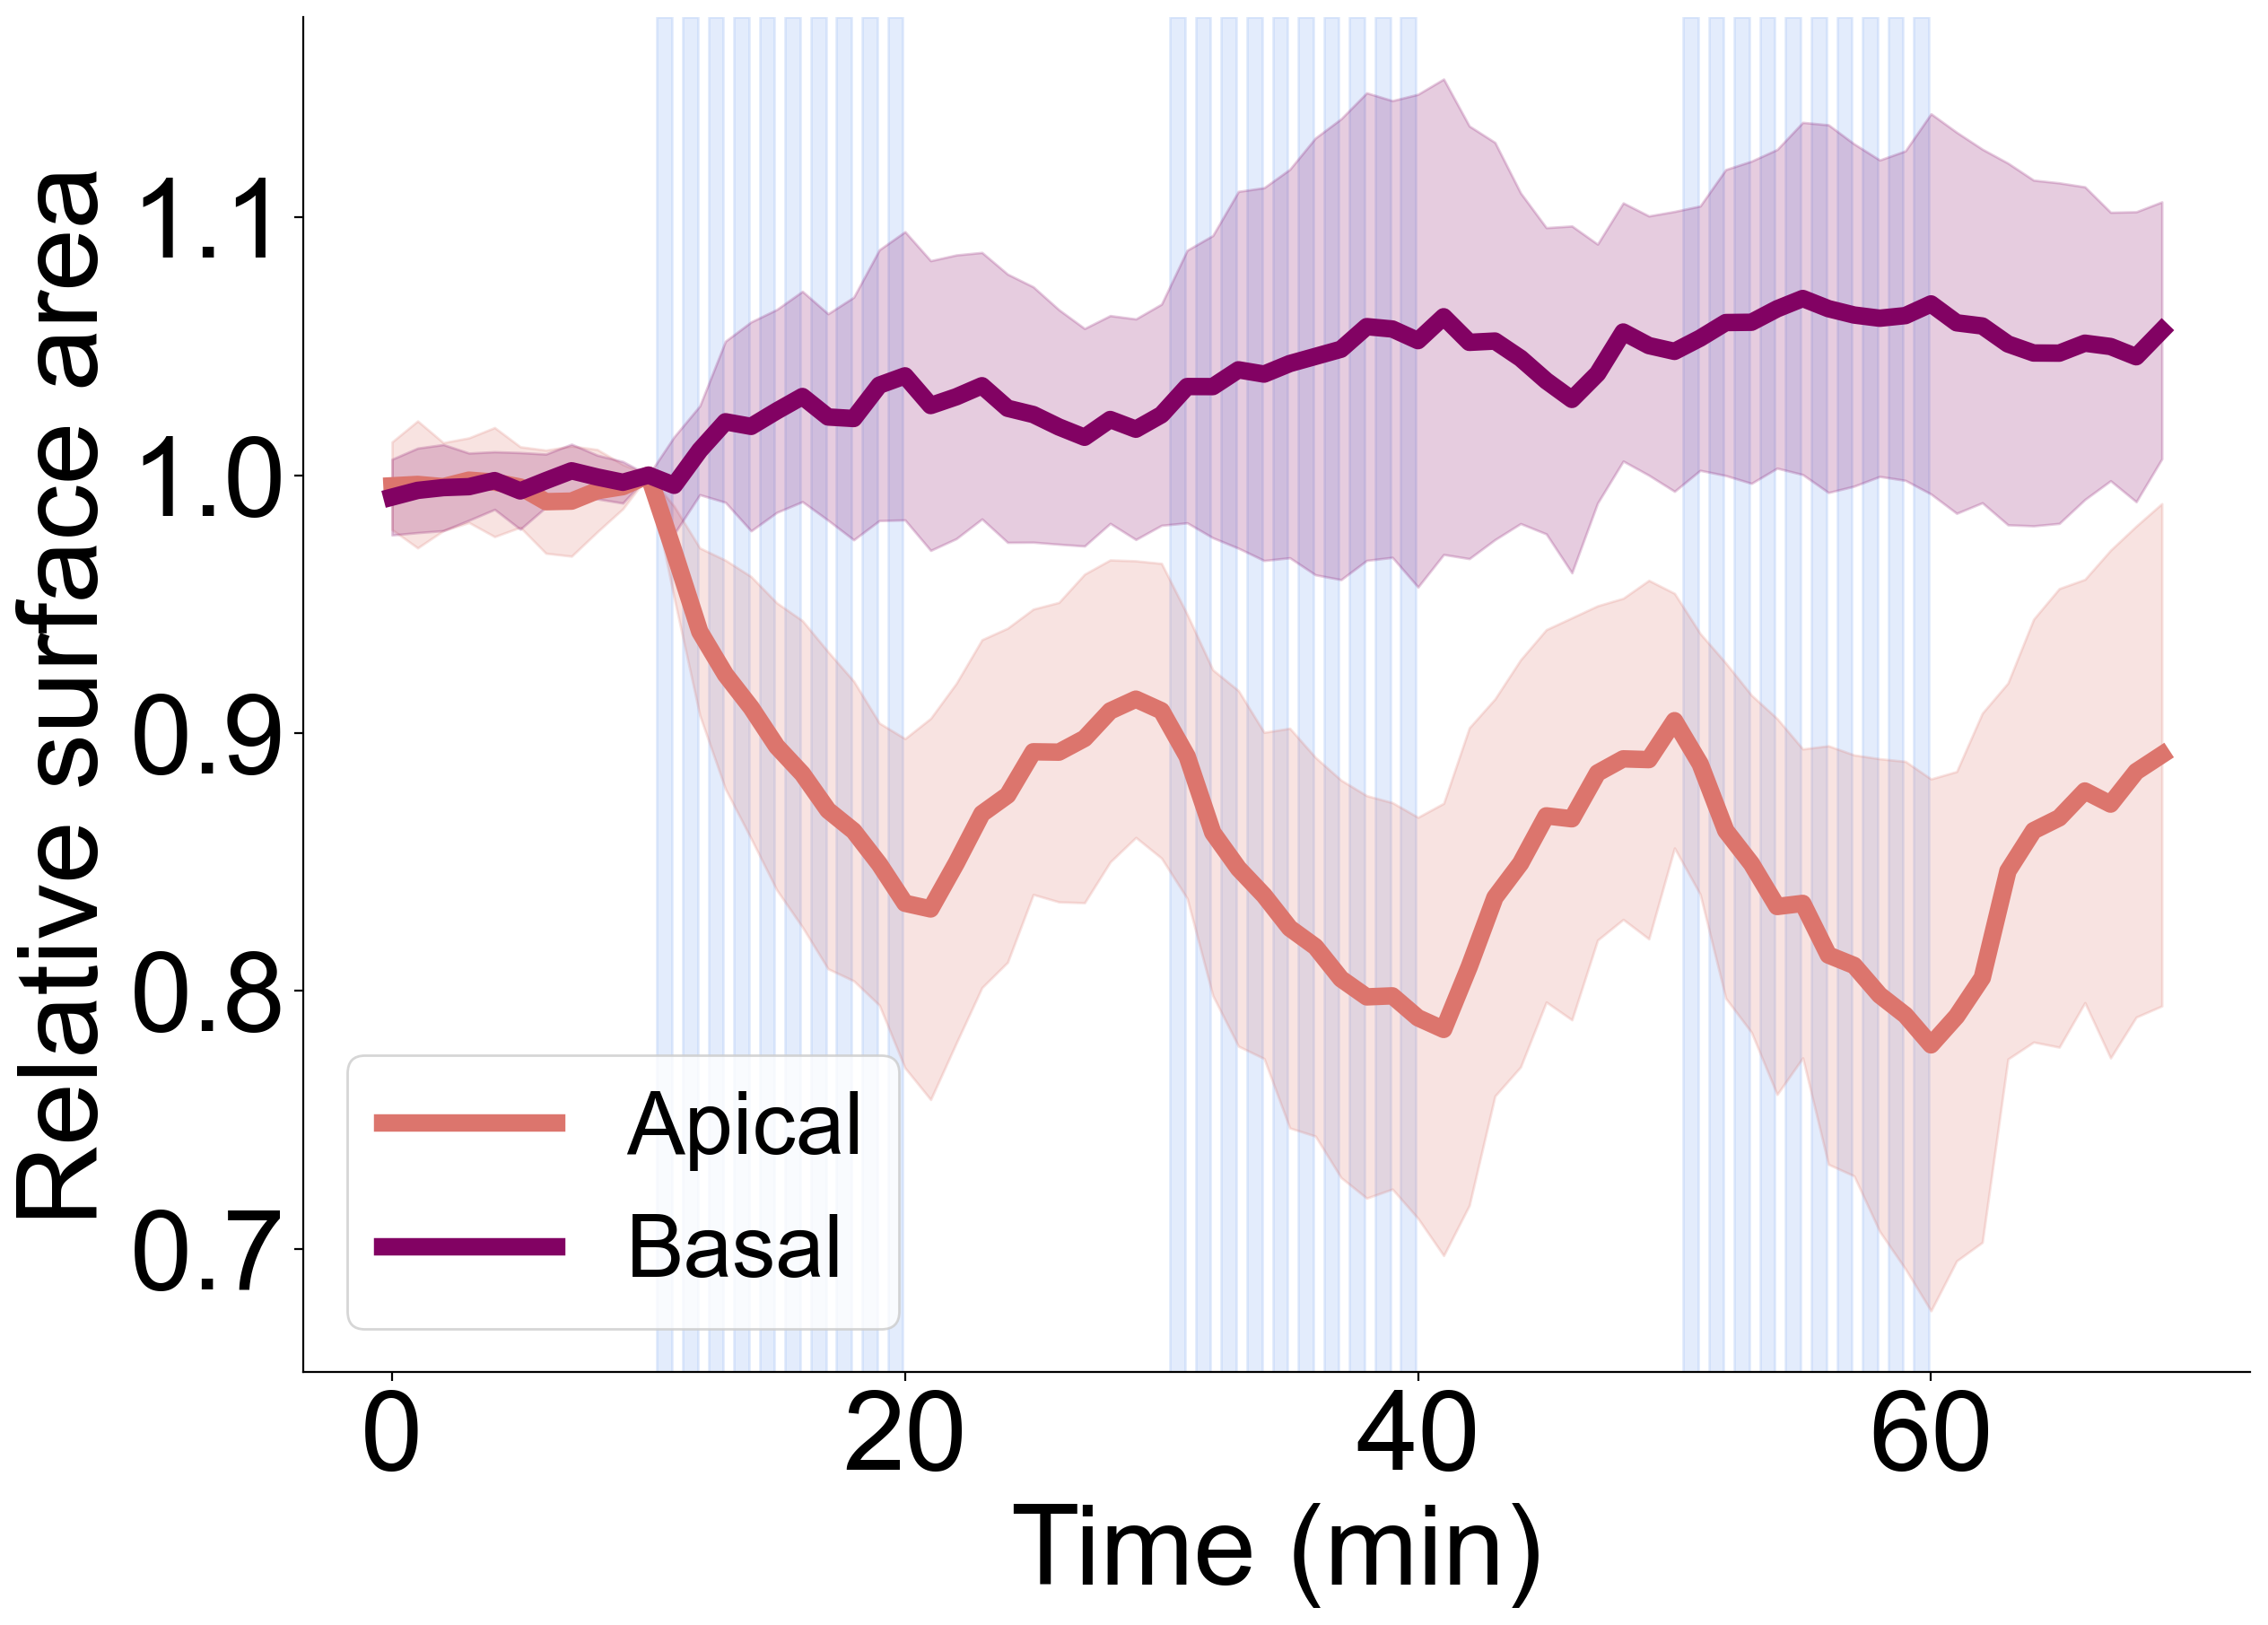

In [8]:
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams.update({'font.size': 45})

meanplusstdapical = []
meanminusstdapical = []
for i in range(time):
    templus = meanapical[i] + sdapical[i]
    tempminus = meanapical[i] - sdapical[i]
    meanplusstdapical.append(templus)
    meanminusstdapical.append(tempminus)


meanplusstdbasal = []
meanminusstdbasal = []
for i in range(time):
    templus = meanbasal[i] + sdbasal[i]
    tempminus = meanbasal[i] - sdbasal[i]
    meanplusstdbasal.append(templus)
    meanminusstdbasal.append(tempminus)    
    

fig, ax = plt.subplots(figsize = (14, 10), dpi=200)
for i in range(10, 20):
    ax.axvspan(i + 0.333, i + 0.917, color = '#a4c3f6', alpha = 0.3)
for i in range(30, 40):
    ax.axvspan(i + 0.333, i + 0.917, color = '#a4c3f6', alpha = 0.3)
for i in range(50, 60):
    ax.axvspan(i + 0.333, i + 0.917, color = '#a4c3f6', alpha = 0.3)
ax.plot(listofapical[0][:,0], meanapical, linewidth = 7, markersize = 8, color = '#dc756d', label = 'Apical' )
ax.fill_between(listofapical[0][:,0], meanplusstdapical, meanminusstdapical, color='#dc756d', alpha=.2)
ax.plot(listofbasal[0][:,0], meanbasal, linewidth = 7, markersize = 8, color = '#820263', label = 'Basal' )
ax.fill_between(listofbasal[0][:,0], meanplusstdbasal, meanminusstdbasal, color='#820263', alpha=.2)
#plt.title('Apical and Basal Surface Measurements', fontsize = 20)
ax.set_xlabel('Time (min)')
ax.set_ylabel('Relative surface area')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(fontsize = 35, loc = "lower left")
fig.savefig(FolderToSave +'/' + 'MeanAndStdfig.png',  bbox_inches='tight')
plt.show()

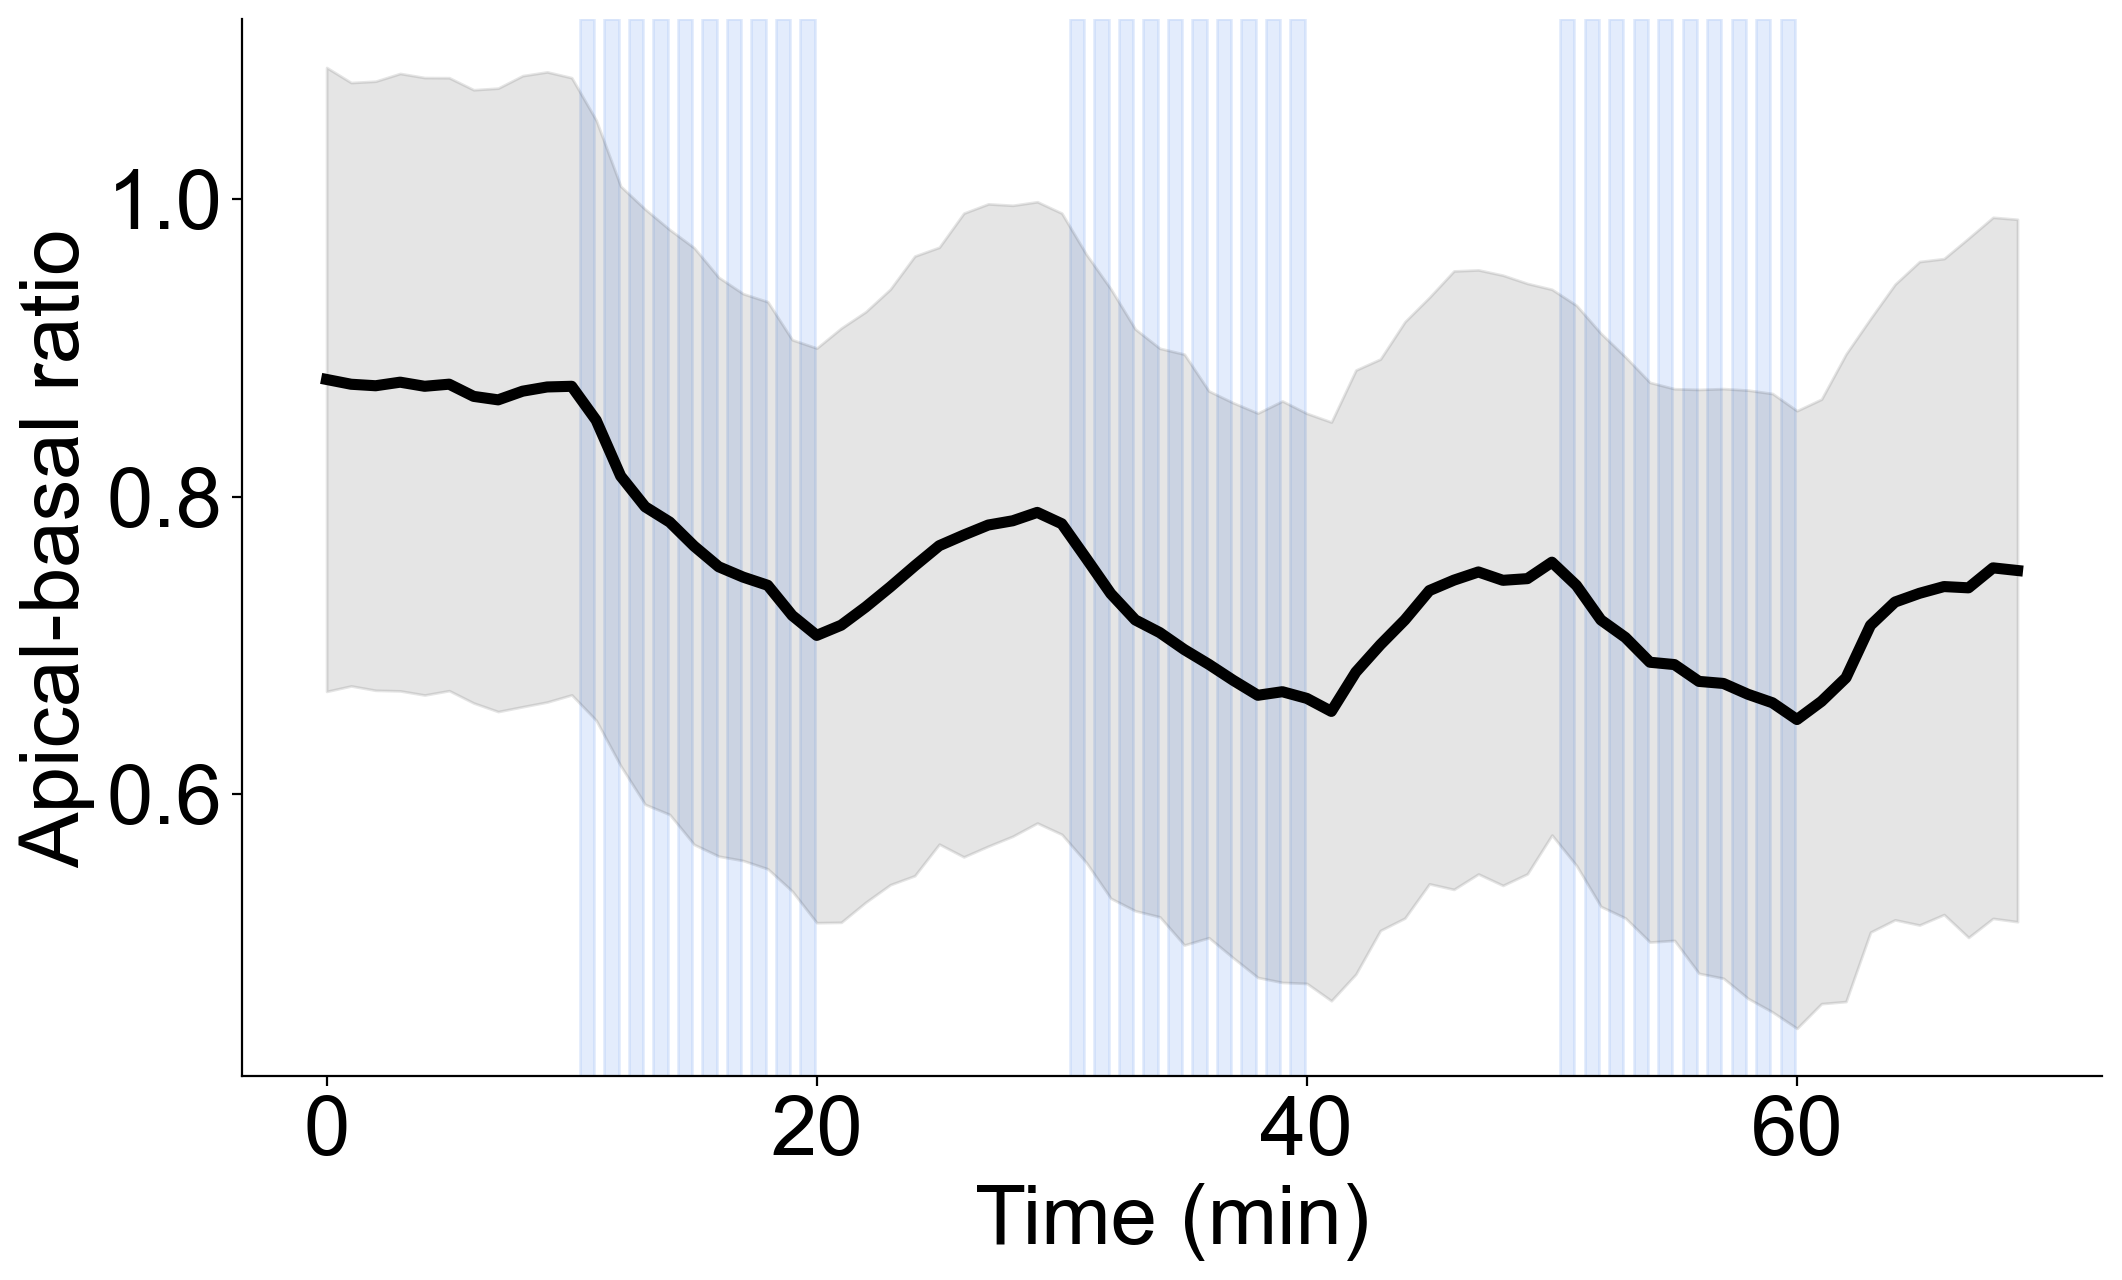

In [10]:
plt.rcParams.update({'font.size': 30})
meanplusstdratio = []
meanminusstdratio = []
for i in range(time):
    templus = meanratio[i] + sdratio[i]
    tempminus = meanratio[i] - sdratio[i]
    meanplusstdratio.append(templus)
    meanminusstdratio.append(tempminus)    
    

fig, ax = plt.subplots(figsize = (12, 7), dpi=200)
for i in range(10, 20):
    ax.axvspan(i + 0.333, i + 0.917, color = '#a4c3f6', alpha = 0.3)
for i in range(30, 40):
    ax.axvspan(i + 0.333, i + 0.917, color = '#a4c3f6', alpha = 0.3)
for i in range(50, 60):
    ax.axvspan(i + 0.333, i + 0.917, color = '#a4c3f6', alpha = 0.3)
ax.plot(listofapical[0][:,0], meanratio, linewidth = 4, markersize = 8, color = 'black')
ax.fill_between(listofapical[0][:,0], meanplusstdratio, meanminusstdratio, color='k', alpha=.1)
#plt.title('Apical//Basal ratio', fontsize = 20)
ax.set_xlabel('Time (min)')
ax.set_ylabel('Apical-basal ratio')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#plt.legend(fontsize = '18')
#plt.savefig(FolderToSave +'/' + 'Apicobasalratio.png',  bbox_inches='tight')
plt.show()

In [15]:
#Exporting the data for source data file code:
import pandas as pd
filepath = r"\\ebisuya.embl.es\ebisuya\Guillermo\Optoshroom3 paper\SourceData\Individual Data"


#First data for the figure 1h
dataexp = pd.DataFrame(list(zip(list(listofapical[0][:,0]), meanapical, meanplusstdapical, meanminusstdapical, meanbasal, meanplusstdbasal, meanminusstdbasal)),
                       columns = ["Time (min)", "Average area apical", "Average apical + standard deviation", "Average apical - standard deviation",
                                 "Average area basal", "Average basal + standard deviation", "Average basal - standard deviation"])

dataexp.to_csv(filepath + '\\repeatedstim.csv', index = False)


In [17]:
#Now for ratio:
#First data for the figure 1h
dataexp = pd.DataFrame(list(zip(list(listofapical[0][:,0]), meanratio, meanplusstdratio, meanminusstdratio)),
                       columns = ["Time (min)", "Average ratio", "ratio + standard deviation", "ratio - standard deviation"])
dataexp.to_csv(filepath + '\\repeatedstimratio.csv', index = False)